In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

lm = LinearRegression()

In [3]:
df = pd.read_csv('Additional_Excercise18.1.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
TV           15 non-null float64
Radio        15 non-null float64
Newspaper    15 non-null float64
Sales        15 non-null float64
dtypes: float64(4)
memory usage: 560.0 bytes


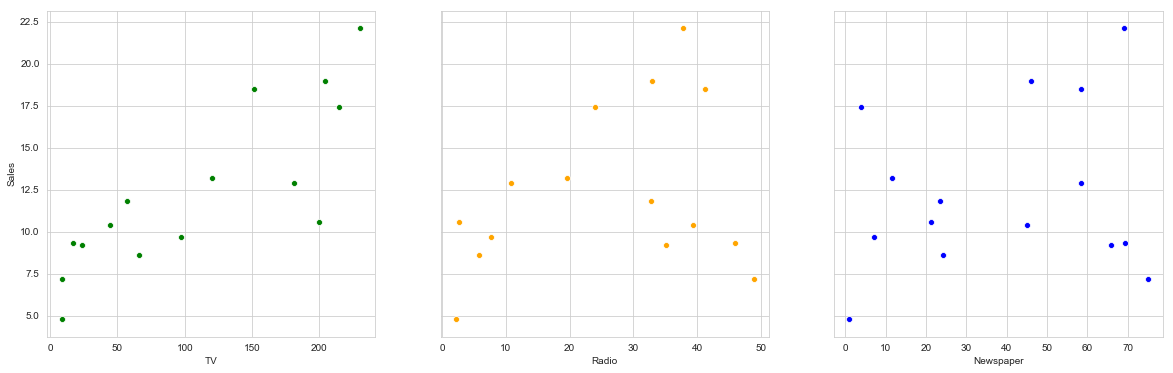

In [6]:
fig, ax = plt.subplots(1,3, figsize=(20,6), sharey=True)
sns.scatterplot(df.TV, df.Sales, ax=ax[0], color='green')
sns.scatterplot(df.Radio, df.Sales, ax=ax[1], color='orange')
sns.scatterplot(df.Newspaper, df.Sales, ax=ax[2], color='blue')

### Linear Regression for TV

intercept=  [6.88446314]
coef=  [[0.04958115]]
R square=  0.38592993523200403


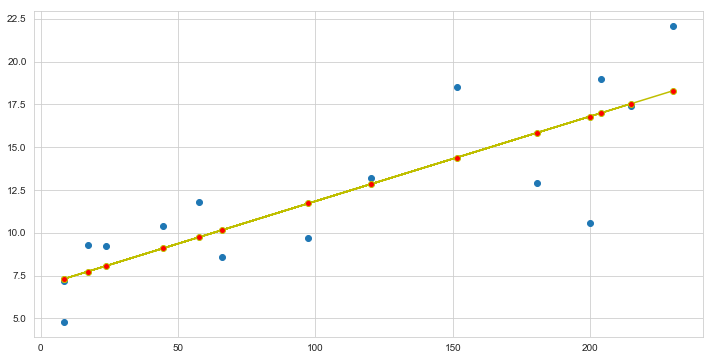

In [7]:
X= df['TV']
y= df['Sales']

y=np.array(y).reshape(-1,1)
X=np.array(X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('intercept= ', lm.intercept_)
print('coef= ', lm.coef_)
print('R square= ', r2_score(y_test, y_pred))

x = X_test.flatten()
m,b = np.polyfit(x, y_pred, 1) 
x= X.flatten()

plt.figure(figsize=(12,6))
plt.scatter(X,y)
plt.plot(x, m*x+b, c= 'y', marker='o', mfc='r') 

### Linear Regression for Radio

intercept=  [9.5868845]
coef=  [[0.12123906]]
R square=  -38.90617158863998


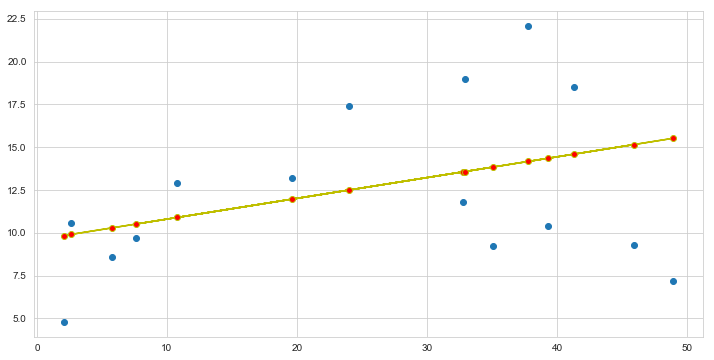

In [8]:
X= df['Radio']
y= df['Sales']

y=np.array(y).reshape(-1,1)
X=np.array(X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('intercept= ', lm.intercept_)
print('coef= ', lm.coef_)
print('R square= ', r2_score(y_test, y_pred))

x = X_test.flatten()
m,b = np.polyfit(x, y_pred, 1) 
x= X.flatten()

plt.figure(figsize=(12,6))
plt.scatter(X,y)
plt.plot(x, m*x+b, c= 'y', marker='o', mfc='r') 

### Linear Regression for Newspaper

intercept=  [10.81407816]
coef=  [[0.04108807]]
R square=  -0.03125967388924655


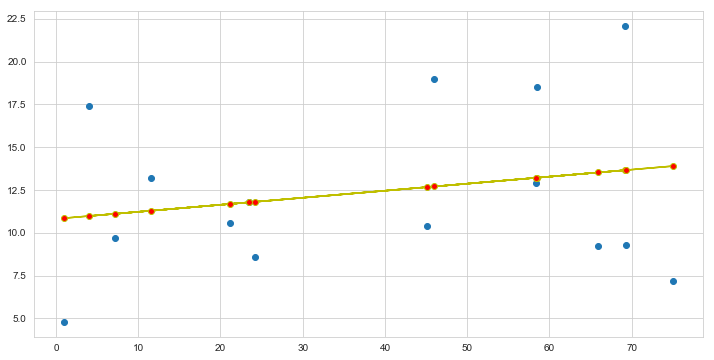

In [9]:
X= df['Newspaper']
y= df['Sales']

y=np.array(y).reshape(-1,1)
X=np.array(X).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('intercept= ', lm.intercept_)
print('coef= ', lm.coef_)
print('R square= ', r2_score(y_test, y_pred))

x = X_test.flatten()
m,b = np.polyfit(x, y_pred, 1) 
x= X.flatten()

plt.figure(figsize=(12,6))
plt.scatter(X,y)
plt.plot(x, m*x+b, c= 'y', marker='o', mfc='r') 


### Multiple Linear Regression

In [10]:
X= df[['TV','Radio','Newspaper']]
y= np.array(df['Sales'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [11]:
print('train-score= ', lm.score(X_train, y_train))
print('test-score= ', lm.score(X_test, y_test))

train-score=  0.9076730854249246
test-score=  0.7047681398397845


In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8959804940778273
MSE: 0.8109035092400587
RMSE: 0.9005018096817233


In [13]:
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['coeffecients']
coeffecients

,coeffecients
TV,0.055656
Radio,0.162725
Newspaper,-0.021607


In [14]:
lm.intercept_

2.7470419621009956

In [15]:
print('r2-Score= ', r2_score(y_test, y_pred))

r2-Score=  0.7047681398397845


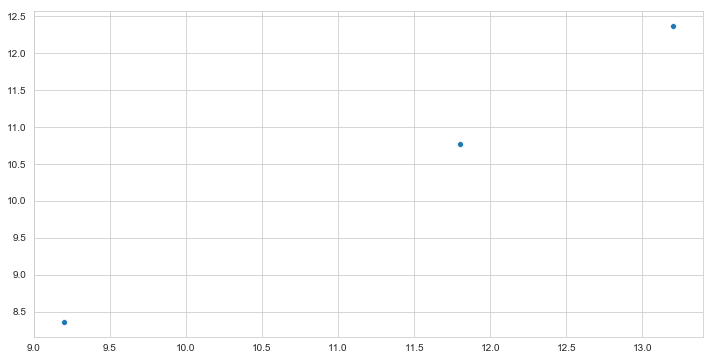

In [16]:
plt.figure(figsize=(12,6))         #y_test and y_pred mapping is almost linear
#plt.scatter(y_test, y_pred)
sns.scatterplot(y_test, y_pred)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


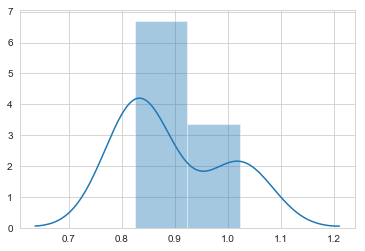

In [17]:
sns.distplot((y_test - y_pred))    #residuals plot is normally distributed